In [1]:
%matplotlib inline

In [2]:
import opendssdirect as dss

In [3]:
dss.run_command("Redirect ../../tests/data/13Bus/IEEE13Nodeckt.dss")

''

In [4]:
dss.run_command("New EnergyMeter.Main Line.650632 1")

''

In [5]:
import networkx as nx

In [6]:
import matplotlib.pyplot as plt

In [7]:
dss.run_command("Solve")

''

In [8]:
df = dss.utils.lines_to_dataframe()

def create_graph(phase=1):
    G = nx.Graph()

    data = df[['Bus1', 'Bus2']].to_dict(orient="index")

    for name in data:
        line = data[name]
        if f".{phase}" in line["Bus1"] and f".{phase}" in line["Bus2"]:
            G.add_edge(line["Bus1"].split(".")[0], line["Bus2"].split(".")[0])

    pos = {}
    for name in dss.Circuit.AllBusNames():
        dss.Circuit.SetActiveBus(f"{name}")
        if phase in dss.Bus.Nodes():
            index = dss.Bus.Nodes().index(phase)
            re, im = dss.Bus.PuVoltage()[index:index+2]
            V = abs(complex(re, im))
            D = dss.Bus.Distance()

            pos[dss.Bus.Name()] = (D, V)
            
    return G, pos


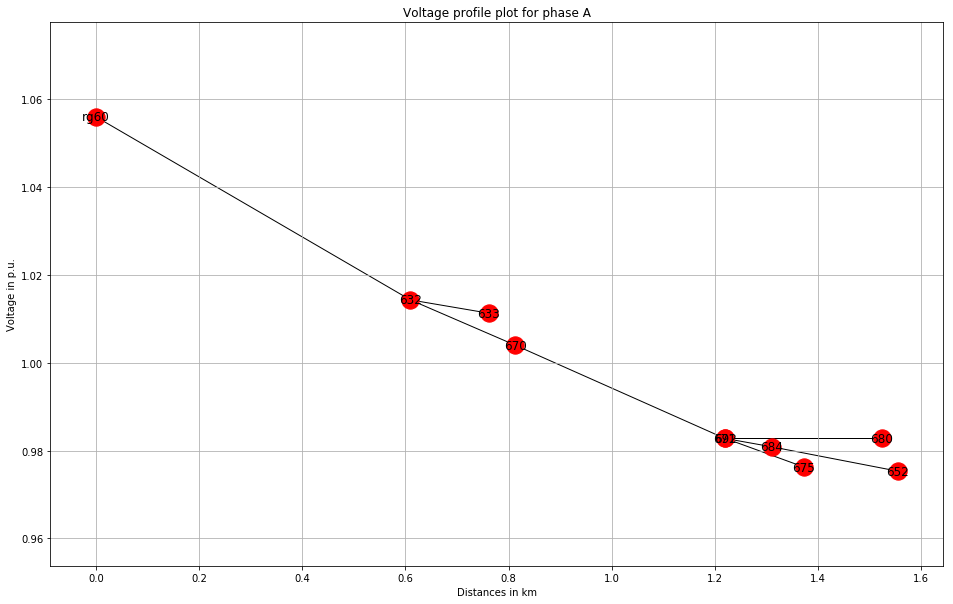

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(16, 10))

ax = axs
G, pos = create_graph(phase=1)
nx.draw_networkx_nodes(G, pos, ax=ax, labels={x: x for x in G.nodes()})
nx.draw_networkx_labels(G, pos, ax=ax, labels={x: x for x in G.nodes()})
nx.draw_networkx_edges(G, pos, ax=ax, labels={x: x for x in G.nodes()})

ax.grid()
ax.set_ylabel("Voltage in p.u.")
ax.set_xlabel("Distances in km")
ax.set_title("Voltage profile plot for phase A");
